<H1 style="color:#8B7959">ADIA</H1>

<H2 style="color:#8B7959">PIPELINE EXAMPLE</H2>

In [1]:
import sys

In [2]:
github_folder_path = r'..'  # Relative path
if github_folder_path not in sys.path:
    sys.path.append(github_folder_path)

from L0_Library.config import *
from L1_Dev.data_prep import DataPrep

In [3]:
pipeline = DataPrep(API_key='db-TGnkbgydKwvp7baYVyikk7EhRW5wa',
                    dataset='XNAS.ITCH',
                    start_date=datetime(2019, 1, 1),  # Might be good to use datetime.date
                    start_hour=9,
                    start_minute=30,
                    end_date=datetime(2019, 1, 31),
                    end_hour=16,
                    end_minute=0,
                    time_zone='US/Eastern')

<H3 style="color:#8B7959">LOB DATA</H3>

In [4]:
# Get data from DataBento
df_lob_data, trading_days, trading_dates = pipeline.get_data('TSLA')
df_lob_data

Processing: 100%|███████████████████████████████████████████████████| 31/31 [03:56<00:00,  7.63s/it]


,symbol,action,side,depth,price,size,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01
ts_event,,,,,,,,,,,,,,
2019-01-02 09:30:00.083438739,TSLA,A,N,1,305.25000,5,306.06000,306.51000,3,3,305.25000,306.97000,5,250
2019-01-02 09:30:00.380926177,TSLA,A,N,2,305.00000,20,306.06000,306.51000,3,3,305.25000,306.97000,5,250
2019-01-02 09:30:00.423428343,TSLA,T,N,0,306.07000,308,306.06000,306.51000,3,3,305.25000,306.97000,5,250
2019-01-02 09:30:00.423511868,TSLA,A,N,1,306.56000,100,306.06000,306.51000,3,3,305.25000,306.56000,5,100
2019-01-02 09:30:00.423526462,TSLA,A,N,1,306.01000,100,306.06000,306.51000,3,3,306.01000,306.56000,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 15:59:59.835688825,TSLA,A,N,4,307.04000,1574,306.75000,306.99000,672,350,306.67000,307.00000,1100,200
2019-01-31 15:59:59.919846463,TSLA,T,N,0,306.97000,100,306.75000,306.99000,672,350,306.67000,307.00000,1100,200
2019-01-31 15:59:59.919846463,TSLA,T,N,0,306.97000,200,306.75000,306.99000,672,350,306.67000,307.00000,1100,200


<H3 style="color:#8B7959">PRICES</H3>

In [5]:
# Calculate prices
df_prices = pipeline.mid_price(df_input=df_lob_data, resample_freq='1T', type_mid='vwmp', drop_na=False)
df_prices

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,306.13370,307.96887,306.19694,NaN,NaN,322.05020,341.90347,335.62302,334.01088,341.88862,...,304.79546,292.92903,282.91364,295.09166,NaN,NaN,292.75728,295.19662,301.27916,300.93413
09:31:00,308.78125,307.71905,303.92522,NaN,NaN,320.60254,340.89737,333.91719,335.37740,342.92349,...,303.94152,291.42451,281.50164,294.25153,NaN,NaN,292.33595,296.08131,301.75844,303.10399
09:32:00,307.92871,306.80485,303.90796,NaN,NaN,320.72418,340.23245,332.55658,335.18927,343.29924,...,304.88478,289.79185,280.22284,293.15185,NaN,NaN,291.72124,296.94633,301.58740,301.81409
09:33:00,305.95099,305.42986,304.13889,NaN,NaN,320.23492,341.34348,333.57468,334.91298,342.52763,...,307.29963,289.03134,281.58814,293.16210,NaN,NaN,291.35925,297.95127,300.88422,299.63020
09:34:00,304.61234,305.72049,304.68946,NaN,NaN,320.78662,341.57322,333.87875,335.68732,342.36954,...,306.32462,289.74779,281.25851,293.24630,NaN,NaN,291.67734,297.34444,300.20822,297.93467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,309.64980,301.05527,316.87321,NaN,NaN,335.26315,334.98008,338.37298,345.09504,347.49359,...,297.77213,287.09473,292.02883,296.87538,NaN,NaN,296.27580,297.27621,308.03606,306.86258
15:56:00,309.30049,300.61890,317.22131,NaN,NaN,334.81346,334.94607,338.86016,344.62438,347.45294,...,297.74488,287.28518,291.97579,296.96086,NaN,NaN,296.32405,297.36859,308.16011,306.88280
15:57:00,309.29442,300.45885,317.72520,NaN,NaN,334.71118,335.06618,338.76325,344.82164,347.33211,...,297.99103,287.21966,291.92256,297.05129,NaN,NaN,296.40675,297.04431,308.59288,307.02983


<H3 style="color:#8B7959">RETURNS</H3>

In [6]:
# Calculate returns
df_returns = pipeline.returns(df_input=df_prices)
df_returns

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,0.00861,-0.00081,-0.00745,NaN,NaN,-0.00451,-0.00295,-0.00510,0.00408,0.00302,...,-0.00281,-0.00515,-0.00500,-0.00285,NaN,NaN,-0.00144,0.00299,0.00159,0.00718
09:32:00,-0.00276,-0.00298,-0.00006,NaN,NaN,0.00038,-0.00195,-0.00408,-0.00056,0.00110,...,0.00310,-0.00562,-0.00455,-0.00374,NaN,NaN,-0.00210,0.00292,-0.00057,-0.00426
09:33:00,-0.00644,-0.00449,0.00076,NaN,NaN,-0.00153,0.00326,0.00306,-0.00082,-0.00225,...,0.00789,-0.00263,0.00486,0.00003,NaN,NaN,-0.00124,0.00338,-0.00233,-0.00726
09:34:00,-0.00438,0.00095,0.00181,NaN,NaN,0.00172,0.00067,0.00091,0.00231,-0.00046,...,-0.00318,0.00248,-0.00117,0.00029,NaN,NaN,0.00109,-0.00204,-0.00225,-0.00567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,0.00145,-0.00034,-0.00025,NaN,NaN,-0.00041,0.00035,0.00023,-0.00044,-0.00012,...,0.00031,0.00070,-0.00010,0.00035,NaN,NaN,-0.00008,0.00078,0.00076,0.00144
15:56:00,-0.00113,-0.00145,0.00110,NaN,NaN,-0.00134,-0.00010,0.00144,-0.00136,-0.00012,...,-0.00009,0.00066,-0.00018,0.00029,NaN,NaN,0.00016,0.00031,0.00040,0.00007
15:57:00,-0.00002,-0.00053,0.00159,NaN,NaN,-0.00031,0.00036,-0.00029,0.00057,-0.00035,...,0.00083,-0.00023,-0.00018,0.00030,NaN,NaN,0.00028,-0.00109,0.00140,0.00048


<H3 style="color:#8B7959">BIPOWER VARIATION</H3>

In [7]:
# Calculate bipower variation
df_bipower_variation = pipeline.rolling_bipower_variation(df_input=df_returns, K=390)
df_bipower_variation

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,0.0000025837,0.0000013624,NaN,NaN,0.0000010980,0.0000012931,0.0000011239,0.0000009364,0.0000008628,...,0.0000018371,0.0000015476,0.0000019724,0.0000015541,NaN,NaN,0.0000006417,0.0000009385,0.0000006202,0.0000006730
09:32:00,NaN,0.0000024973,0.0000013544,NaN,NaN,0.0000011031,0.0000013094,0.0000011846,0.0000008616,0.0000008669,...,0.0000018587,0.0000016293,0.0000019476,0.0000015052,NaN,NaN,0.0000006108,0.0000009615,0.0000005886,0.0000007931
09:33:00,NaN,0.0000024793,0.0000013006,NaN,NaN,0.0000011053,0.0000013328,0.0000012093,0.0000008131,0.0000008750,...,0.0000019538,0.0000015902,0.0000019773,0.0000014164,NaN,NaN,0.0000006208,0.0000009908,0.0000005541,0.0000009128
09:34:00,NaN,0.0000023825,0.0000012889,NaN,NaN,0.0000011104,0.0000013310,0.0000012117,0.0000008095,0.0000008715,...,0.0000020498,0.0000015152,0.0000019741,0.0000013934,NaN,NaN,0.0000006263,0.0000010131,0.0000005475,0.0000010581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,0.0000013711,0.0000010941,NaN,NaN,0.0000012970,0.0000011323,0.0000009315,0.0000008620,0.0000006628,...,0.0000015159,0.0000019639,0.0000016029,0.0000006374,NaN,NaN,0.0000009430,0.0000006103,0.0000006658,0.0000018166
15:56:00,NaN,0.0000013664,0.0000010932,NaN,NaN,0.0000012981,0.0000011302,0.0000009327,0.0000008631,0.0000006605,...,0.0000015156,0.0000019657,0.0000016011,0.0000006378,NaN,NaN,0.0000009427,0.0000006112,0.0000006660,0.0000018157
15:57:00,NaN,0.0000013695,0.0000010971,NaN,NaN,0.0000012927,0.0000011287,0.0000009342,0.0000008645,0.0000006575,...,0.0000015156,0.0000019660,0.0000016006,0.0000006380,NaN,NaN,0.0000009425,0.0000006124,0.0000006669,0.0000018136


<H3 style="color:#8B7959">PERIODICITY</H3>

In [8]:
# Calculate periodicity
df_std_returns_1 = df_returns / np.sqrt(df_bipower_variation)
df_f0 = pipeline.df_periodicity(df_input=df_std_returns_1, threshold=16)
df_std_returns_2 = df_std_returns_1 / df_f0
df_f1 = pipeline.df_periodicity(df_input=df_std_returns_2, threshold=6.635)
df_f = df_f0 * df_f1
df_f

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,3.15911,3.15911,NaN,NaN,3.15911,3.15911,3.15911,3.15911,3.15911,...,3.15911,3.15911,3.15911,3.15911,NaN,NaN,3.15911,3.15911,3.15911,3.15911
09:32:00,NaN,3.07847,3.07847,NaN,NaN,3.07847,3.07847,3.07847,3.07847,3.07847,...,3.07847,3.07847,3.07847,3.07847,NaN,NaN,3.07847,3.07847,3.07847,3.07847
09:33:00,NaN,3.15974,3.15974,NaN,NaN,3.15974,3.15974,3.15974,3.15974,3.15974,...,3.15974,3.15974,3.15974,3.15974,NaN,NaN,3.15974,3.15974,3.15974,3.15974
09:34:00,NaN,2.05078,2.05078,NaN,NaN,2.05078,2.05078,2.05078,2.05078,2.05078,...,2.05078,2.05078,2.05078,2.05078,NaN,NaN,2.05078,2.05078,2.05078,2.05078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,0.65452,0.65452,NaN,NaN,0.65452,0.65452,0.65452,0.65452,0.65452,...,0.65452,0.65452,0.65452,0.65452,NaN,NaN,0.65452,0.65452,0.65452,0.65452
15:56:00,NaN,0.80638,0.80638,NaN,NaN,0.80638,0.80638,0.80638,0.80638,0.80638,...,0.80638,0.80638,0.80638,0.80638,NaN,NaN,0.80638,0.80638,0.80638,0.80638
15:57:00,NaN,0.80797,0.80797,NaN,NaN,0.80797,0.80797,0.80797,0.80797,0.80797,...,0.80797,0.80797,0.80797,0.80797,NaN,NaN,0.80797,0.80797,0.80797,0.80797


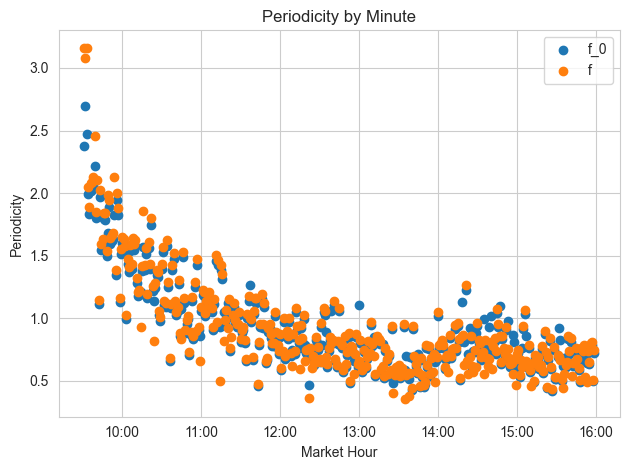

In [9]:
# Plot periodicity
sns.set_style("whitegrid")
plt.scatter(pd.to_datetime(df_f0.index, format='%H:%M:%S'), df_f0.iloc[:, 1], label='f_0', marker='o')
plt.scatter(pd.to_datetime(df_f.index, format='%H:%M:%S'), df_f.iloc[:, 1], label='f', marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=0)
plt.xlabel('Market Hour')
plt.ylabel('Periodicity')
plt.title('Periodicity by Minute')
plt.legend()
plt.tight_layout()
plt.show()

<H3 style="color:#8B7959">JUMP SCORE</H3>

In [10]:
# Calculate jump score
df_jump_score = pipeline.jump_score(df_returns=df_returns, df_bipower_variation=df_bipower_variation, df_f=df_f)
df_jump_score

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,-0.15981,-2.01952,NaN,NaN,-1.36102,-0.82035,-1.52150,1.33562,1.02999,...,-0.65524,-1.31027,-1.12773,-0.72394,NaN,NaN,-0.56912,0.97778,0.63891,2.77213
09:32:00,NaN,-0.61159,-0.01585,NaN,NaN,0.11733,-0.55424,-1.21857,-0.19636,0.38207,...,0.73830,-1.42972,-1.05981,-0.99136,NaN,NaN,-0.87488,0.96642,-0.24007,-1.55555
09:33:00,NaN,-0.90280,0.21079,NaN,NaN,-0.45957,0.89374,0.87971,-0.28943,-0.76132,...,1.78629,-0.65949,1.09390,0.00930,NaN,NaN,-0.49873,1.07420,-0.99243,-2.40557
09:34:00,NaN,0.30046,0.77682,NaN,NaN,0.79654,0.28437,0.40360,1.25161,-0.24113,...,-1.08235,0.98071,-0.40650,0.11863,NaN,NaN,0.67234,-0.98766,-1.48225,-2.69016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,-0.44152,-0.36160,NaN,NaN,-0.55082,0.50174,0.36985,-0.72858,-0.22945,...,0.38504,0.76445,-0.11775,0.67090,NaN,NaN,-0.12598,1.52457,1.42671,1.62750
15:56:00,NaN,-1.53881,1.30223,NaN,NaN,-1.46091,-0.11845,1.84743,-1.82183,-0.17852,...,-0.09218,0.58656,-0.17801,0.44706,NaN,NaN,0.20801,0.49284,0.61184,0.06065
15:57:00,NaN,-0.56322,1.87541,NaN,NaN,-0.33260,0.41768,-0.36627,0.76170,-0.53094,...,0.83077,-0.20132,-0.17837,0.47178,NaN,NaN,0.35571,-1.72563,2.12686,0.44021


In [11]:
# Create an HDF5 file and write DataFrames to it
with h5py.File('../Data/TSLA_data.h5', 'w') as hdf_file:
    # Save each DataFrame as a separate dataset
    hdf_file.create_dataset('prices', data=df_prices)
    hdf_file.create_dataset('returns', data=df_returns)
    hdf_file.create_dataset('bipower_variation', data=df_bipower_variation)
    hdf_file.create_dataset('periodicity_0', data=df_f0)
    hdf_file.create_dataset('periodicity_1', data=df_f1)
    hdf_file.create_dataset('periodicity', data=df_f)
    hdf_file.create_dataset('jump_score', data=df_f)
    
    # Add attributes to the file level
    hdf_file.attrs['Description'] = 'HDF5 File storing data pipeline'
    hdf_file.attrs['Start_Date'] = '01-01-2019'
    hdf_file.attrs['End_Date'] = '01-01-2019'
    hdf_file.attrs['Start_Time'] = '09:30'
    hdf_file.attrs['End_Time'] = '16:00'
    hdf_file.attrs['Time_Zone'] = 'US/Eastern'

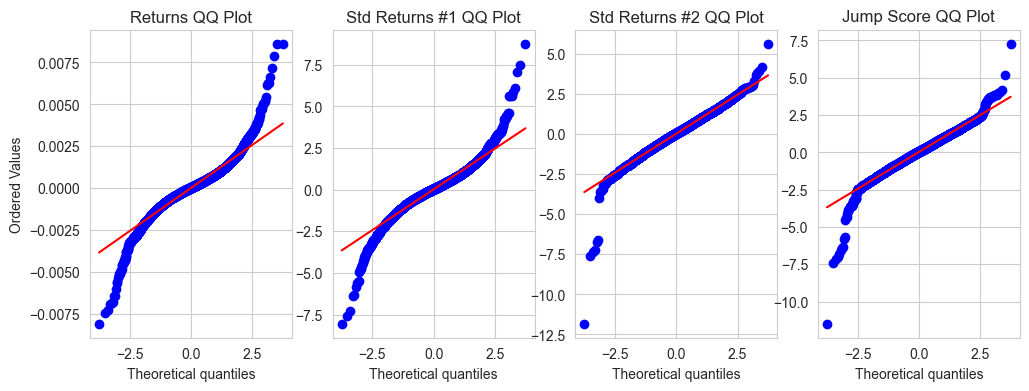

In [12]:
# Calculate quantiles and generate the QQ plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
stats.probplot(df_returns.unstack().dropna(), dist='norm', plot=axes[0])
axes[0].set_title('Returns QQ Plot')
axes[0].set_ylabel('Ordered Values')
stats.probplot(df_std_returns_1.unstack().dropna(), dist='norm', plot=axes[1])
axes[1].set_title('Std Returns #1 QQ Plot')
axes[1].set_ylabel('')
stats.probplot(df_std_returns_2.unstack().dropna(), dist='norm', plot=axes[2])
axes[2].set_title('Std Returns #2 QQ Plot')
axes[2].set_ylabel('')
stats.probplot(df_jump_score.unstack().dropna(), dist='norm', plot=axes[3])
axes[3].set_title('Jump Score QQ Plot')
axes[3].set_ylabel('')
plt.show()

In [13]:
df_jumps = df_jump_score.applymap(lambda x: np.nan if np.isnan(x) else 1 if np.abs(x) > 4.36 else 0)
df_jumps.iloc[:15,:] = 0
df_jumps.iloc[375:,:] = 0
df_jumps = df_jumps.where(df_jump_score.notna(), np.nan)

In [30]:
test = df_jumps.unstack().reset_index()
test

,Date,Hour,0
0,2019-01-02,09:30:00,NaN
1,2019-01-02,09:31:00,NaN
2,2019-01-02,09:32:00,NaN
3,2019-01-02,09:33:00,NaN
4,2019-01-02,09:34:00,NaN
...,...,...,...
11695,2019-01-31,15:55:00,0.00000
11696,2019-01-31,15:56:00,0.00000
11697,2019-01-31,15:57:00,0.00000
11698,2019-01-31,15:58:00,0.00000


In [66]:
##### Parameters #####

# API-Key
api_key = "7vjl2kzbnxdltdz2hxixyzhbc07yltk4keyh5az9"

# tickers: it can be one or more. Ex.: tickers=AAPL,TSLA,AMZN
tickers = ["TSLA"]
api_tickers = ",".join(tickers)

# items: from 1 to 100 (let's keep 100 as default)
items = 10

# pages: set pages=1 for recursion to get all news available
pages = 1

# date: yeartodate (up to March 2019) / 03152019-03252019 / last7days / ... (check other options in the website).
### format: MM/DD/YYYY
start_date = "01/01/2019"
end_date = "01/20/2019"

### Convert the start_date and end_date strings
start_date_dt = datetime.strptime(start_date, "%m/%d/%Y").strftime("%m%d%Y")
end_date_dt = datetime.strptime(end_date, "%m/%d/%Y").strftime("%m%d%Y")
date = f"{start_date_dt}-{end_date_dt}"

In [28]:
# while True:
#     url = f"https://stocknewsapi.com/api/v1?tickers={api_tickers}&items={items}&page={pages}&date={date}&token={api_key}"

#     payload = {}
#     headers = {}

#     response = requests.request("GET", url, headers=headers, data=payload)
#     response_data = json.loads(response.text)
#     print(response_data)
#     if 'message' in response_data and 'errors' in response_data:
#         print(f"API Error: {response_data['message']}")
#         break  # Exit the loop if an API error is encountered

#     current_data = pd.DataFrame(response_data['data'])

#     if current_data.empty:
#         print(f"API Error: current_data is empty.")
#         break  # Exit the loop if new_data is empty
        
#     if pages == 1:
#         news_data = current_data
#     else:
#         news_data = pd.concat([news_data, current_data], ignore_index=True)
    
#     pages += 1